In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv('CVD_cleaned.csv')

In [4]:
data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [6]:
numerical_features = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

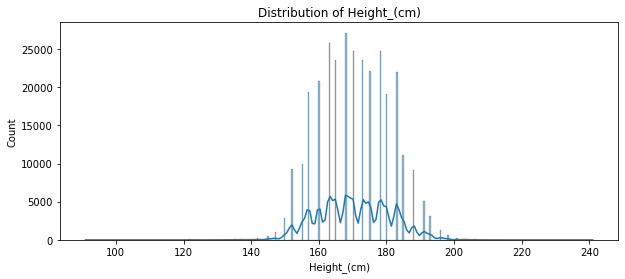

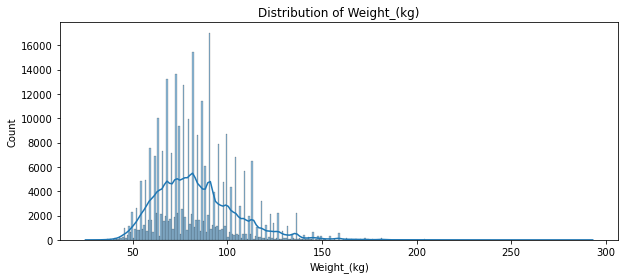

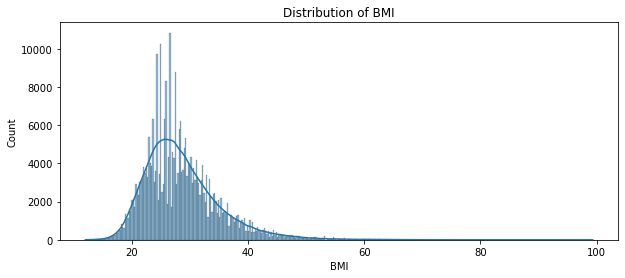

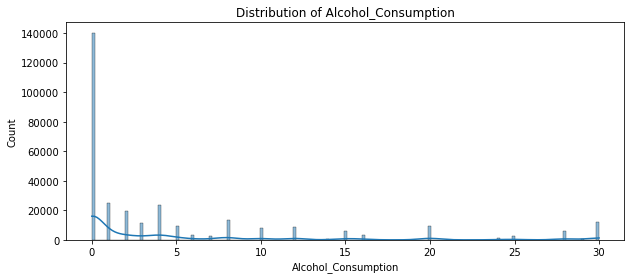

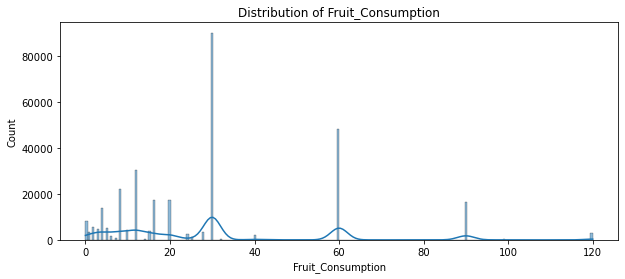

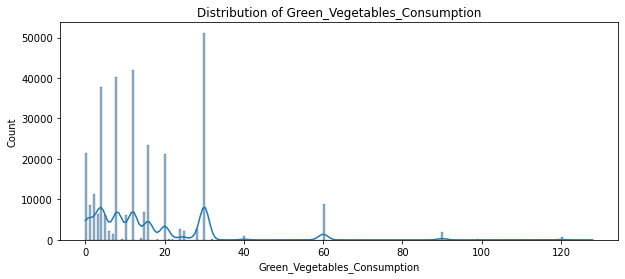

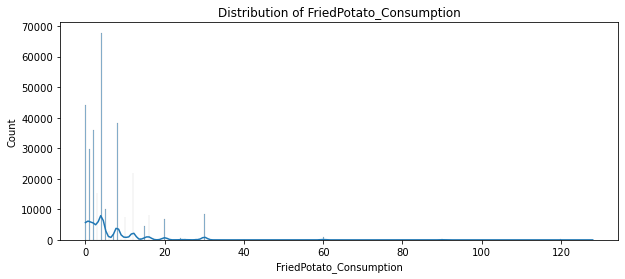

In [7]:
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data=data, x=feature, kde=True)
    plt.title('Distribution of ' + feature)
    plt.show()

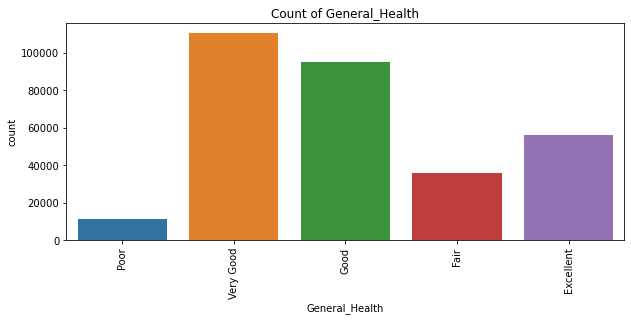

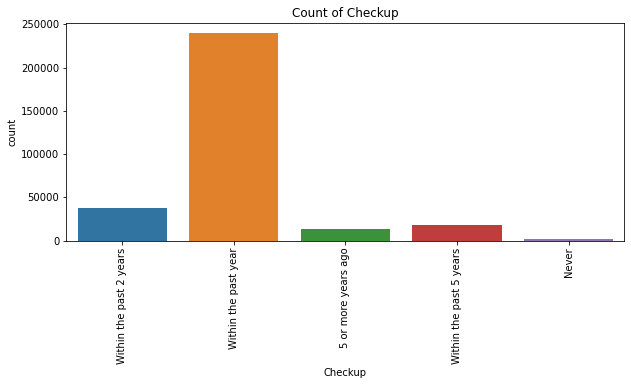

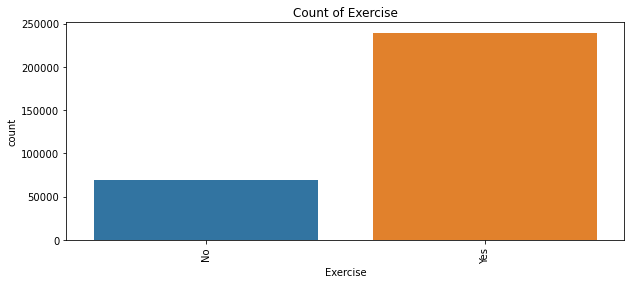

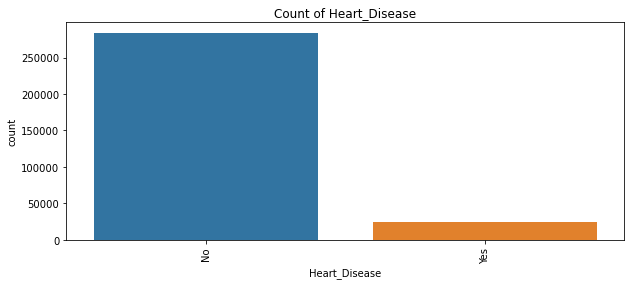

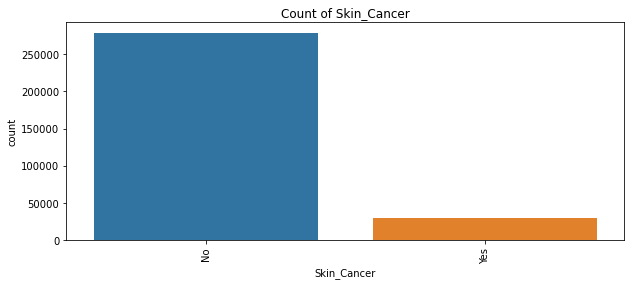

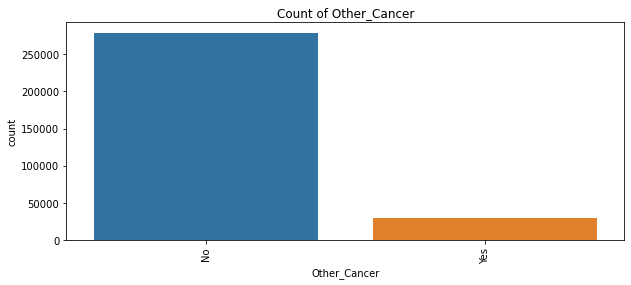

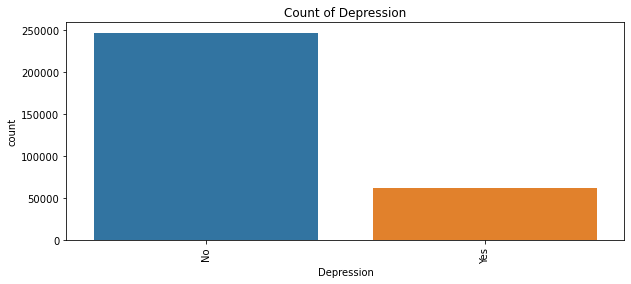

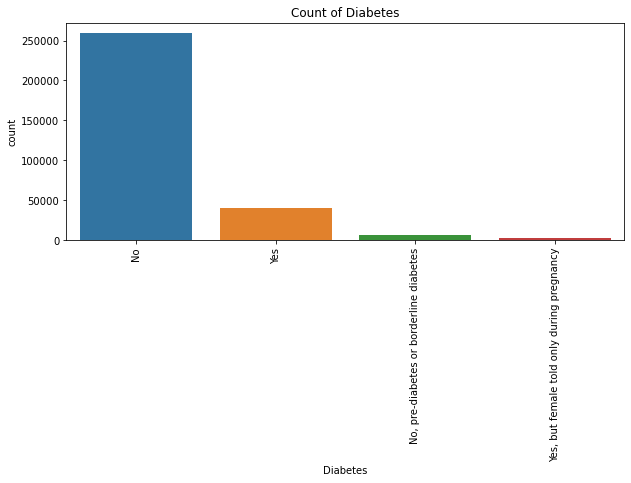

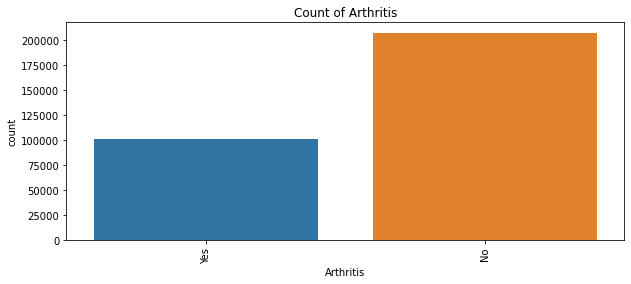

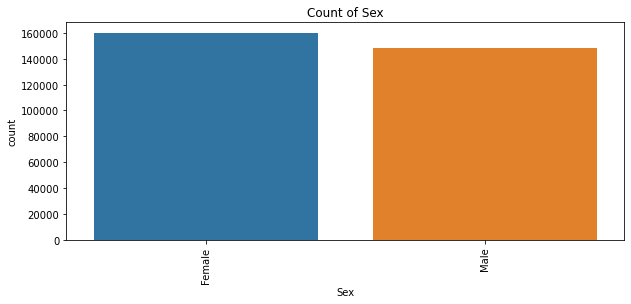

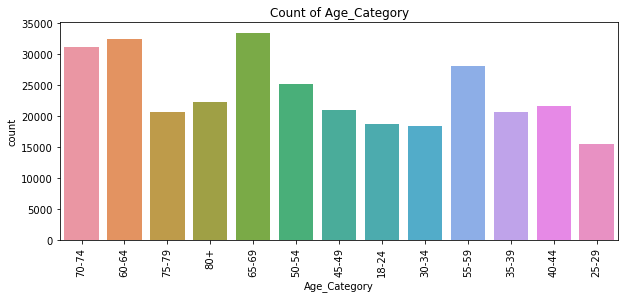

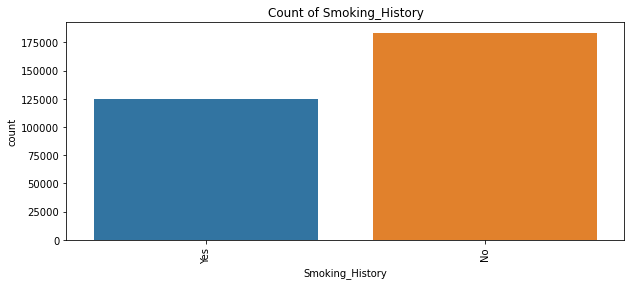

In [8]:
categorical_features = ['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']

for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=data, x=feature)
    plt.title('Count of ' + feature)
    plt.xticks(rotation=90)
    plt.show()

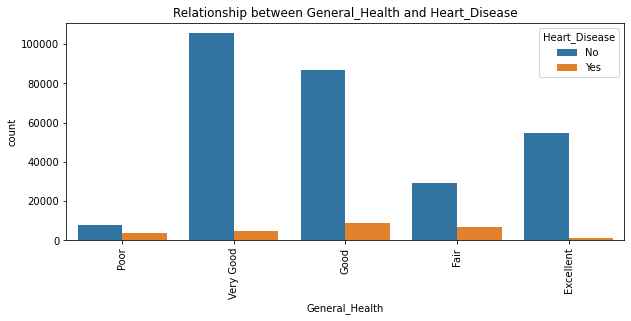

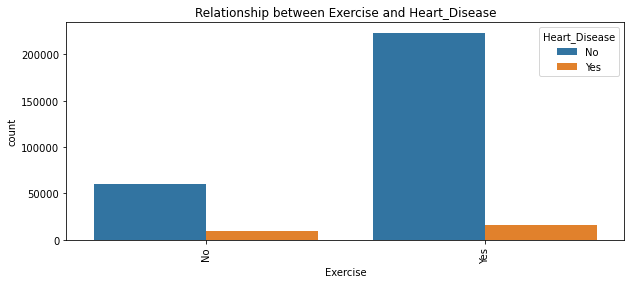

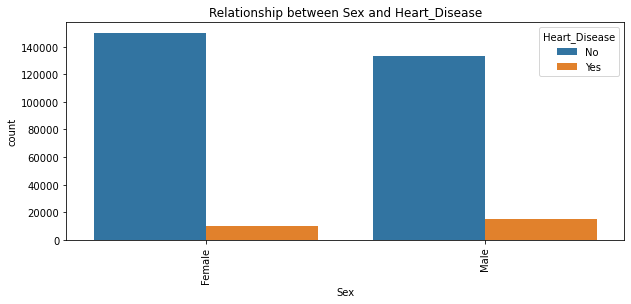

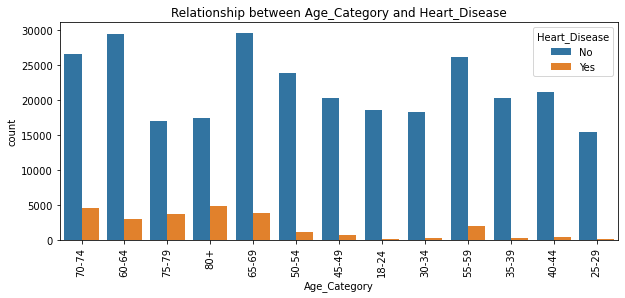

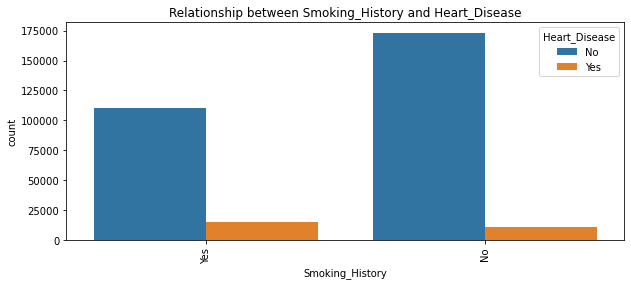

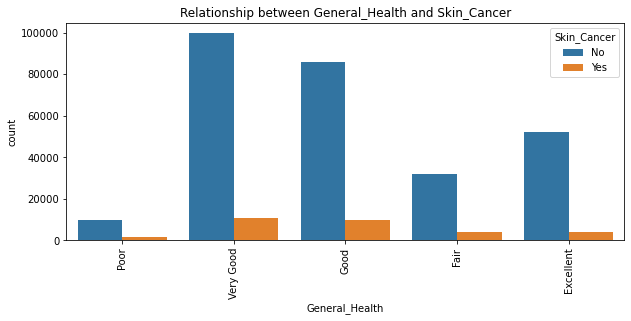

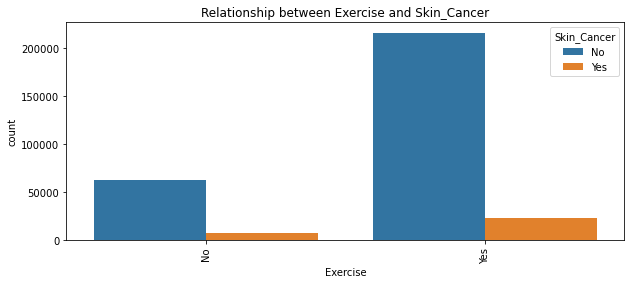

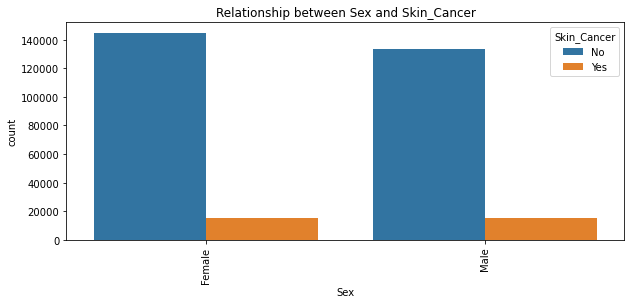

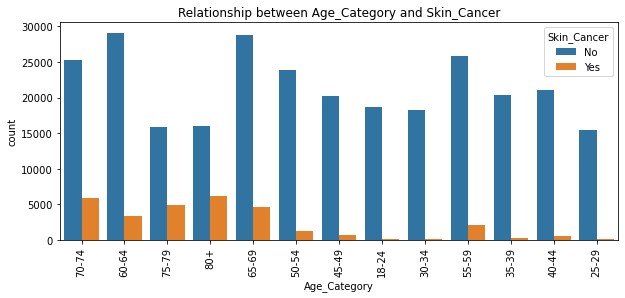

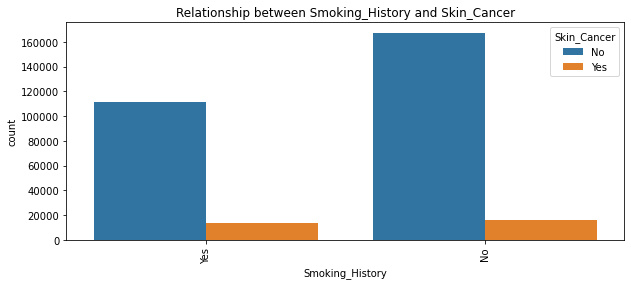

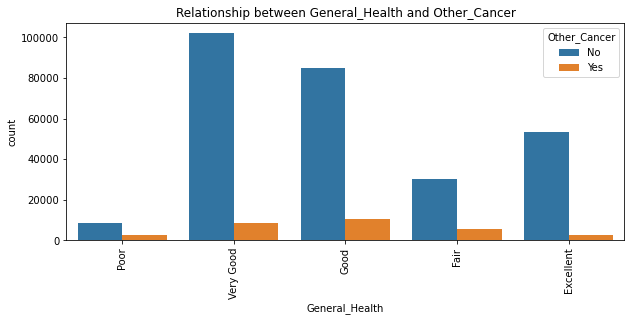

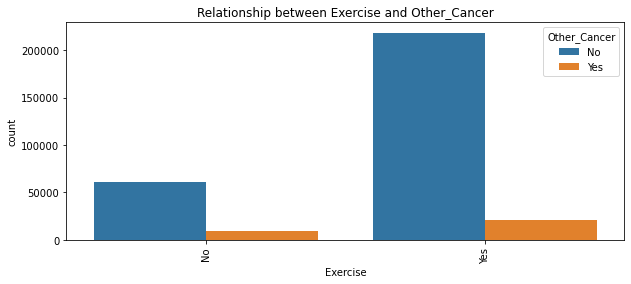

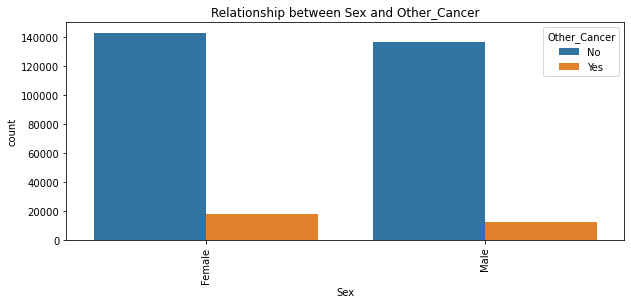

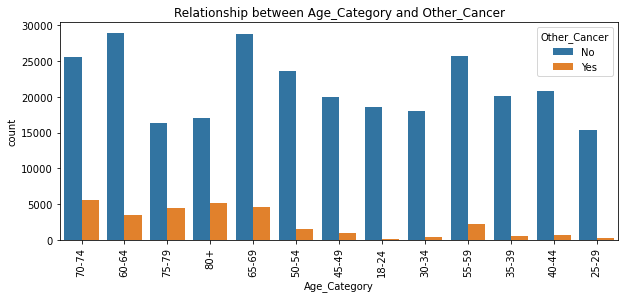

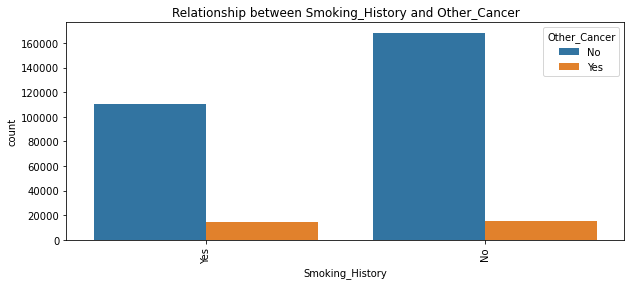

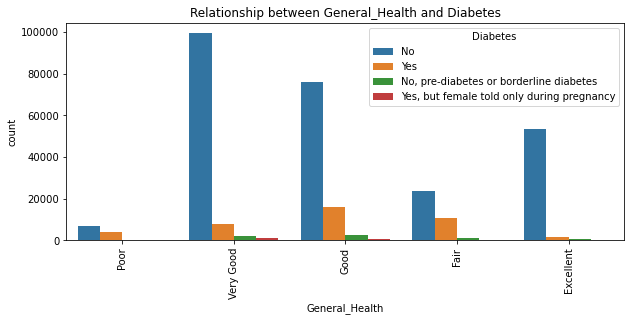

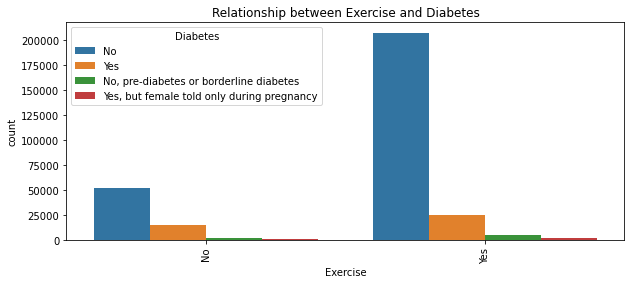

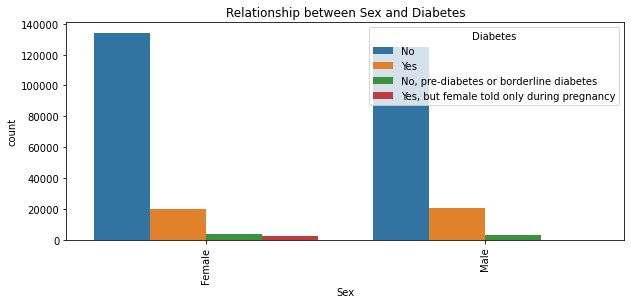

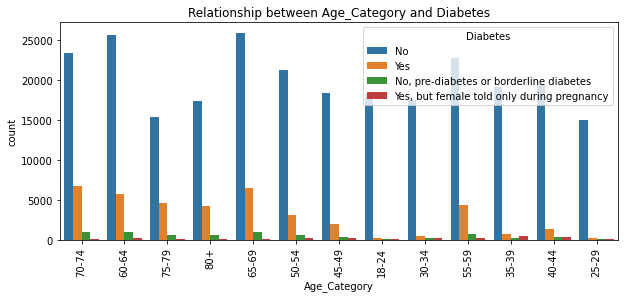

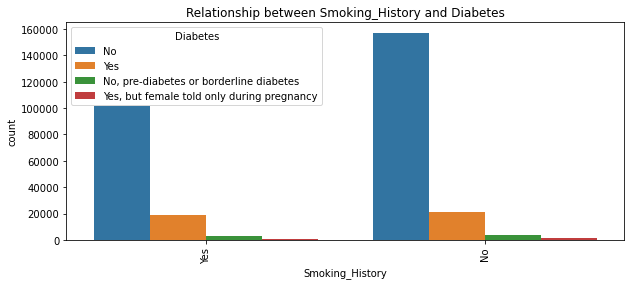

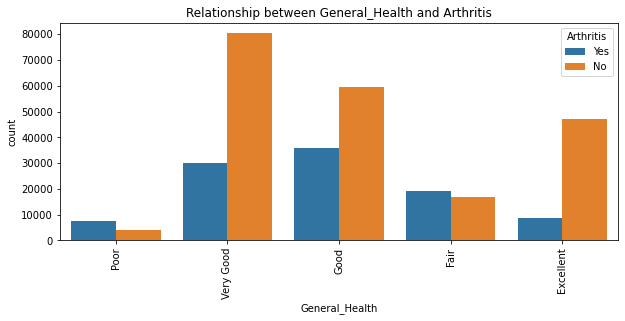

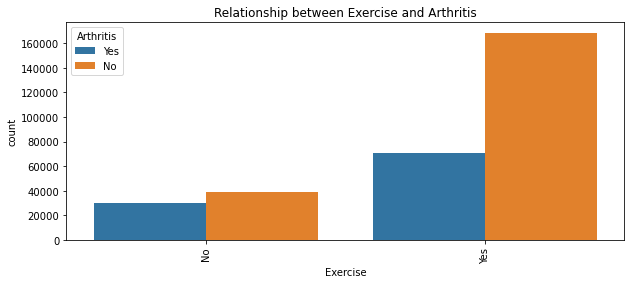

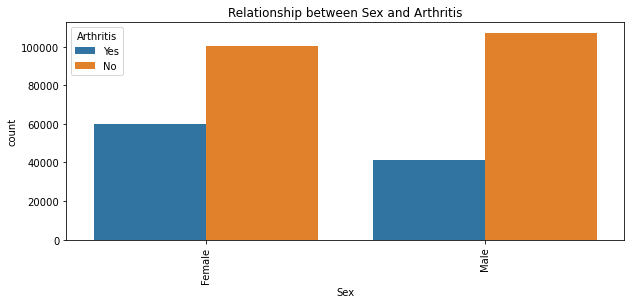

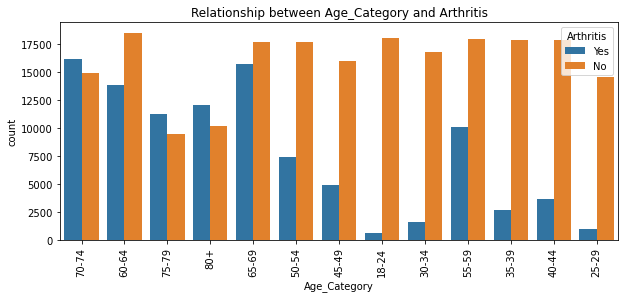

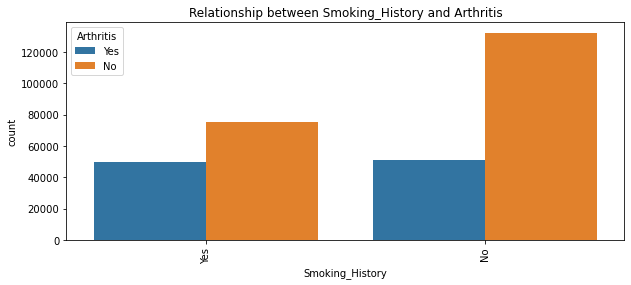

In [9]:
selected_variables = ['General_Health', 'Exercise', 'Sex', 'Age_Category', 'Smoking_History']

disease_conditions = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes', 'Arthritis']

for disease in disease_conditions:
    for variable in selected_variables:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=data, x=variable, hue=disease)
        plt.title('Relationship between ' + variable + ' and ' + disease)
        plt.xticks(rotation=90)
        plt.show()

In [10]:
diabetes_mapping = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)
data = pd.get_dummies(data, columns=['Sex'])

binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})

general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}

data['General_Health'] = data['General_Health'].map(general_health_mapping)
checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4
    
}
data['Checkup'] = data['Checkup'].map(checkup_mapping)

age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping) 

data.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Sex_Female,Sex_Male
0,0,2.0,0,0,0,0,0,0,1,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0,1,0
1,3,4.0,0,1,0,0,0,1,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0,1,0
2,3,4.0,1,0,0,0,0,1,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0,1,0
3,0,4.0,1,1,0,0,0,1,0,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0,0,1
4,2,4.0,0,0,0,0,0,0,0,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0,0,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  float64
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  int64  
 9   Age_Category                  308854 non-null  int64  
 10  Height_(cm)                   308854 non-null  float64
 11  Weight_(kg)                   308854 non-null  float64
 12  BMI                           308854 non-nul

In [12]:
len(data)-len(data.drop_duplicates())

83

In [13]:
data = data.drop_duplicates()

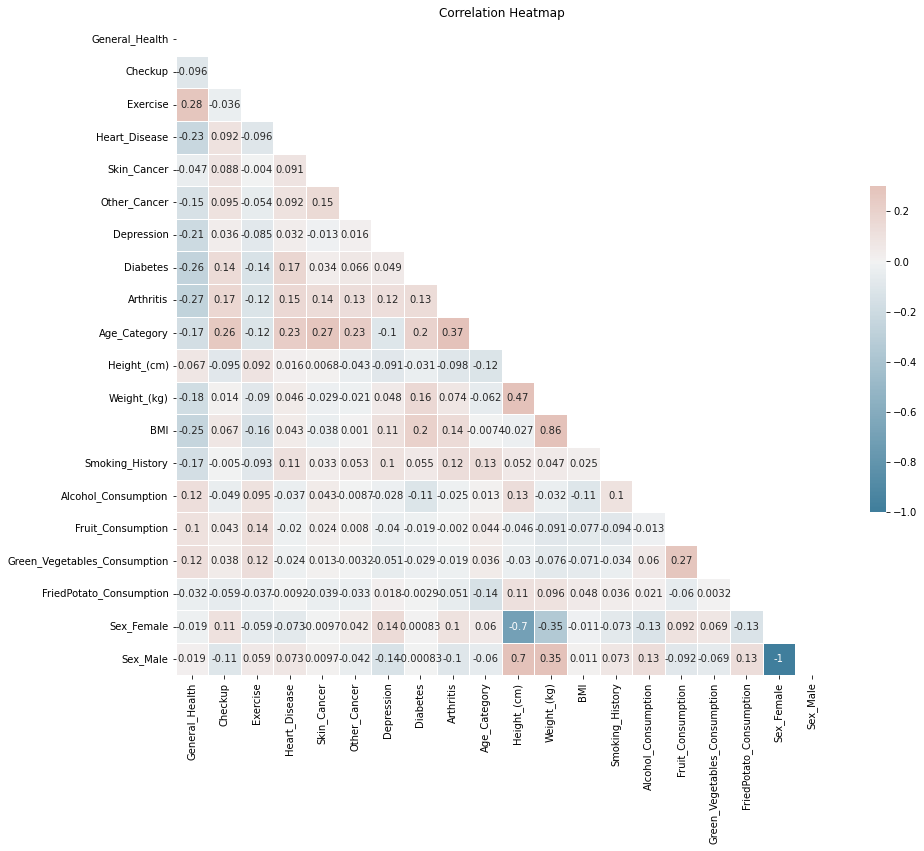

In [14]:
corr = data.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

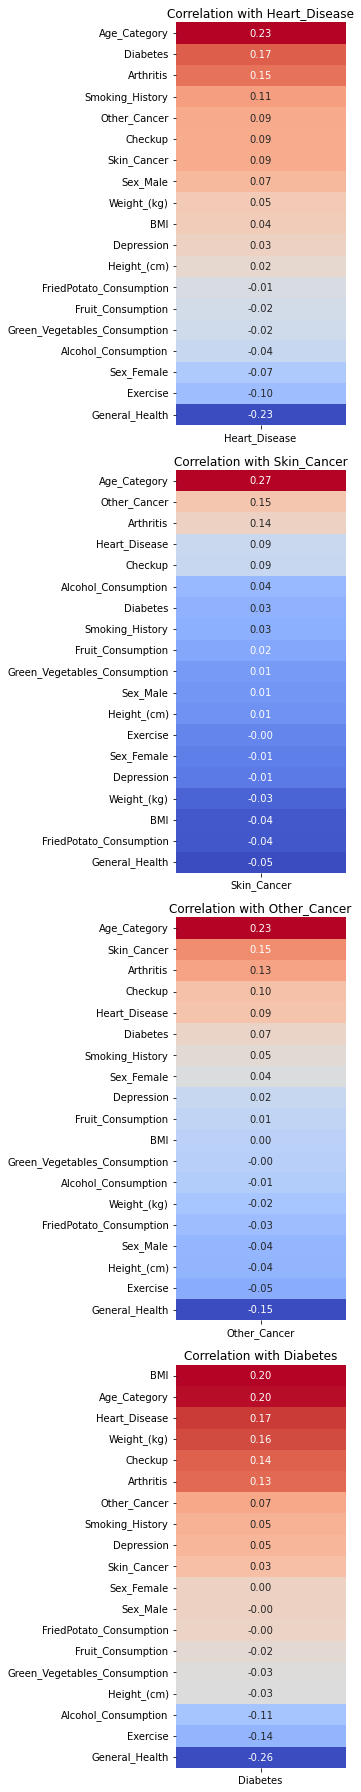

In [15]:
disease_variables = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes']

corr = data.corr()

fig, axs = plt.subplots(len(disease_variables), 1, figsize=(5, 25))

for ax, disease in zip(axs, disease_variables):
    target_corr = corr[disease].drop(disease)
    
    target_corr_sorted = target_corr.sort_values(ascending=False)

    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False, ax=ax)
    ax.set_title('Correlation with ' + disease)

plt.tight_layout()
plt.show()

In [16]:
data.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Sex_Female                      0
Sex_Male                        0
dtype: int64

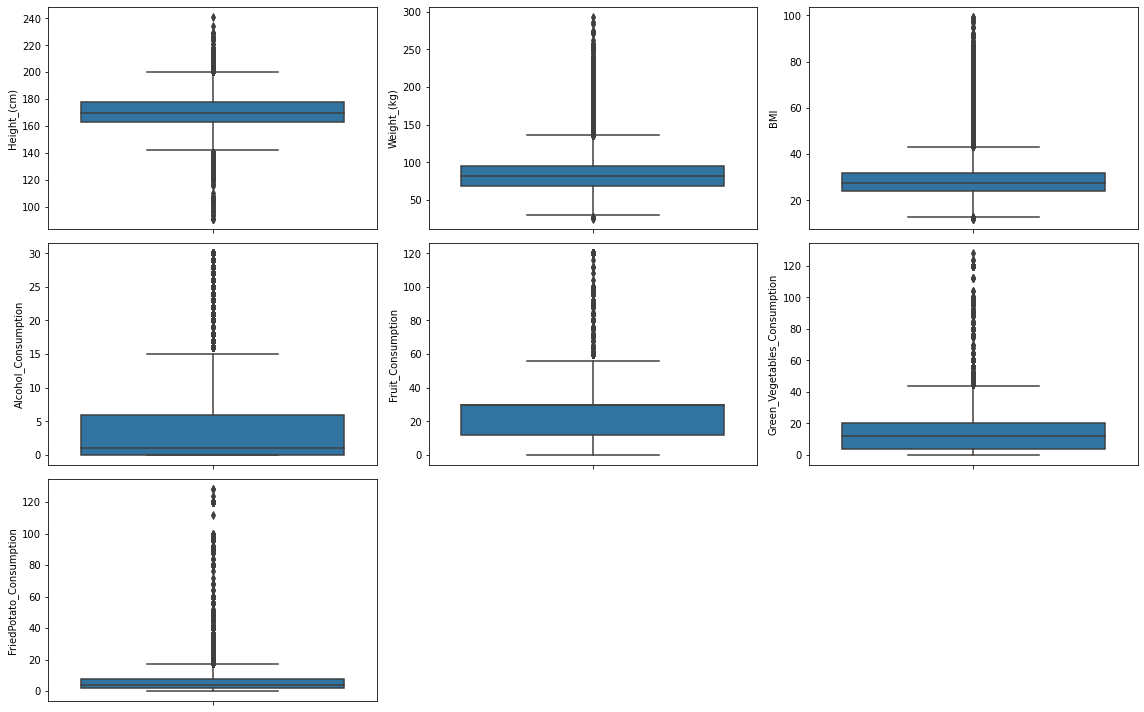

In [17]:
numerical_cols = ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 
                  'Fruit_Consumption', 'Green_Vegetables_Consumption', 
                  'FriedPotato_Consumption']

plt.figure(figsize=(16, 10))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])

plt.tight_layout()

In [18]:
data = pd.read_csv('CVD_cleaned.csv')


In [19]:
data = data.drop_duplicates()

In [20]:
data.shape

(308774, 19)

In [21]:
data['BMI_Category'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, np.inf], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity'])

checkup_mapping = {'Within the past year': 4, 'Within the past 2 years': 2, 'Within the past 5 years': 1, '5 or more years ago': 0.2, 'Never': 0}
data['Checkup_Frequency'] = data['Checkup'].replace(checkup_mapping)

exercise_mapping = {'Yes': 1, 'No': 0}
smoking_mapping = {'Yes': -1, 'No': 0}
data['Lifestyle_Score'] = data['Exercise'].replace(exercise_mapping) - data['Smoking_History'].replace(smoking_mapping) + data['Fruit_Consumption']/10 + data['Green_Vegetables_Consumption']/10 - data['Alcohol_Consumption']/10

data['Healthy_Diet_Score'] = data['Fruit_Consumption']/10 + data['Green_Vegetables_Consumption']/10 - data['FriedPotato_Consumption']/10

data['Smoking_Alcohol'] = data['Smoking_History'].replace(smoking_mapping) * data['Alcohol_Consumption']
data['Checkup_Exercise'] = data['Checkup_Frequency'] * data['Exercise'].replace(exercise_mapping)

data['Height_to_Weight'] = data['Height_(cm)'] / data['Weight_(kg)']

data['Fruit_Vegetables'] = data['Fruit_Consumption'] * data['Green_Vegetables_Consumption'] +data['Fruit_Consumption'] +  data['Green_Vegetables_Consumption'] 

data['HealthyDiet_Lifestyle'] = data['Healthy_Diet_Score'] * data['Lifestyle_Score']

data['Alcohol_FriedPotato'] = data['Alcohol_Consumption'] * data['FriedPotato_Consumption'] + data['Alcohol_Consumption'] +  data['FriedPotato_Consumption'] 

In [22]:
diabetes_mapping = {
    'No': 0, 
    'No, pre-diabetes or borderline diabetes': 0, 
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
data['Diabetes'] = data['Diabetes'].map(diabetes_mapping)

data = pd.get_dummies(data, columns=['Sex'])

binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    data[column] = data[column].map({'Yes': 1, 'No': 0})
    
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
data['General_Health'] = data['General_Health'].map(general_health_mapping)

bmi_mapping = {
    'Underweight': 0,
    'Normal weight': 1,
    'Overweight': 2,
    'Obesity': 3
}

data['BMI_Category'] = data['BMI_Category'].map(bmi_mapping).astype(int)

age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
data['Age_Category'] = data['Age_Category'].map(age_category_mapping)    

data = data.drop(["Checkup"],axis=1)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve 
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

In [24]:
X = data.drop('Heart_Disease', axis=1)
y = data['Heart_Disease']

In [25]:
X.shape

(308774, 28)

In [26]:
y.shape

(308774,)

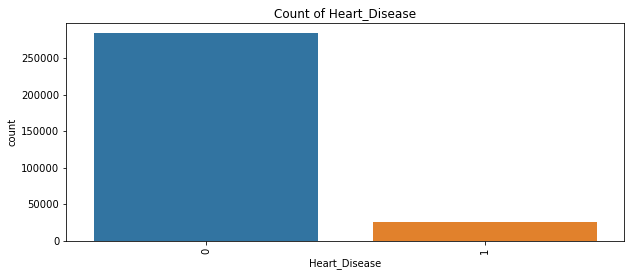

In [27]:
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Heart_Disease')
plt.title('Count of ' + 'Heart_Disease')
plt.xticks(rotation=90)
plt.show()

In [28]:
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

In [29]:
display(pd.DataFrame(np.array(y_balanced)))

,0
0,0
1,1
2,0
3,1
4,0
...,...
567601,1
567602,1
567603,1
567604,1


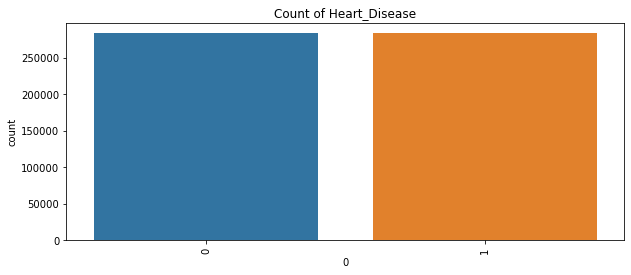

In [30]:
plt.figure(figsize=(10, 4))
sns.countplot(data=pd.DataFrame(np.array(y_balanced)), x=0)
plt.title('Count of ' + 'Heart_Disease')
plt.xticks(rotation=90)
plt.show()

In [31]:
y_balanced.shape

(567606,)

In [32]:
display(X_balanced)

,General_Health,Exercise,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Age_Category,Height_(cm),Weight_(kg),...,Lifestyle_Score,Healthy_Diet_Score,Smoking_Alcohol,Checkup_Exercise,Height_to_Weight,Fruit_Vegetables,HealthyDiet_Lifestyle,Alcohol_FriedPotato,Sex_Female,Sex_Male
0,0,0,0,0,0,0,1,10,150.000000,32.660000,...,5.600000,3.400000,-0.0000,0.000000,4.592774,526.000000,19.040000,12.000000,1,0
1,3,0,0,0,0,1,0,10,165.000000,77.110000,...,3.000000,2.600000,0.0000,0.000000,2.139800,30.000000,7.800000,4.000000,1,0
2,3,1,0,0,0,1,0,8,163.000000,88.450000,...,2.100000,-0.100000,0.0000,4.000000,1.842849,51.000000,-0.210000,84.000000,1,0
3,0,1,0,0,0,1,0,11,180.000000,93.440000,...,7.000000,5.200000,0.0000,4.000000,1.926370,960.000000,36.400000,8.000000,0,1
4,2,0,0,0,0,0,0,12,191.000000,88.450000,...,2.200000,1.200000,-0.0000,0.000000,2.159412,44.000000,2.640000,0.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567601,2,0,0,0,0,0,1,7,169.277984,62.343424,...,3.238992,1.391698,0.0000,2.555969,2.715987,64.000000,4.576902,2.083024,1,0
567602,0,0,1,0,0,0,0,9,181.036080,106.243077,...,0.534536,0.992784,-23.2732,0.000000,1.717497,77.092799,0.517114,231.963920,0,1
567603,2,0,1,0,0,0,1,11,177.096184,94.521079,...,5.301272,3.920509,0.0000,1.205089,1.874560,774.000000,20.867887,77.974557,0,1
567604,0,0,0,0,0,0,0,11,185.104825,76.288494,...,2.600000,0.800000,0.0000,0.000000,2.426153,80.000000,2.080000,8.000000,0,1


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [34]:
model = XGBClassifier(
    scale_pos_weight=sum(y_train==0)/sum(y_train==1),
    eval_metric='logloss', 
    use_label_encoder=False
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_score = model.predict_proba(X_test)[:,1]

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56471
           1       0.98      0.91      0.95     57051

    accuracy                           0.95    113522
   macro avg       0.95      0.95      0.95    113522
weighted avg       0.95      0.95      0.95    113522



In [36]:
y_pred = model.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96    283803
           1       0.48      0.14      0.21     24971

    accuracy                           0.92    308774
   macro avg       0.70      0.56      0.59    308774
weighted avg       0.89      0.92      0.90    308774



In [37]:
lr_d = LogisticRegression()
rf_d = RandomForestClassifier()

lr_d.fit(X_train, y_train)
rf_d.fit(X_train, y_train)

lr_pred_d = lr_d.predict(X_test)
rf_pred_d = rf_d.predict(X_test)

c:\Users\MeltemArman\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
y_pred = lr_d.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.68      0.80    283803
           1       0.18      0.77      0.29     24971

    accuracy                           0.69    308774
   macro avg       0.57      0.73      0.54    308774
weighted avg       0.91      0.69      0.76    308774



In [39]:
print(classification_report(y_test, lr_pred_d))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72     56471
           1       0.72      0.79      0.75     57051

    accuracy                           0.74    113522
   macro avg       0.74      0.74      0.74    113522
weighted avg       0.74      0.74      0.74    113522



In [40]:
y_pred = rf_d.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    283803
           1       0.91      0.86      0.89     24971

    accuracy                           0.98    308774
   macro avg       0.95      0.93      0.94    308774
weighted avg       0.98      0.98      0.98    308774



In [41]:
print(classification_report(y_test, rf_pred_d))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     56471
           1       0.96      0.93      0.95     57051

    accuracy                           0.95    113522
   macro avg       0.95      0.95      0.95    113522
weighted avg       0.95      0.95      0.95    113522



In [42]:
from sklearn.neural_network import MLPRegressor #ysa
regr = MLPRegressor(random_state=1, max_iter=500, learning_rate_init=0.01).fit(X_train, y_train)

c:\Users\MeltemArman\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [43]:
y_pred = regr.predict(X_test)

In [44]:
import joblib
joblib.dump(rf_d, 'trained_model.pkl')

['trained_model.pkl']